In [5]:
from models.vision.image_classification.mobilenet import load_model, MobileNetModelsType
from weight_type import WeightType
import torch

In [1]:
from torchvision import transforms
test = transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ])
type(test)

torchvision.transforms.transforms.Compose

In [2]:
NUM_CLASS = 1

In [3]:
model = load_model(MobileNetModelsType.mobilenet_v2, WeightType.Pretrained, num_class=NUM_CLASS)

In [10]:
output = model(torch.rand((4, 3, 640, 640)))

In [19]:
torch.argmax(torch.softmax(output, dim=1), dim=1)

tensor([731,  18, 791, 731])

In [12]:
model.classifier[-1]

Linear(in_features=1280, out_features=1000, bias=True)

In [13]:
small_v3_model = load_model(MobileNetModelsType.mobilenet_v3_small, WeightType.Pretrained, num_class=NUM_CLASS)

In [14]:
small_v3_model.classifier

Sequential(
  (0): Linear(in_features=576, out_features=1024, bias=True)
  (1): Hardswish()
  (2): Dropout(p=0.2, inplace=True)
  (3): Linear(in_features=1024, out_features=1000, bias=True)
)

In [15]:
large_v3_model = load_model(MobileNetModelsType.mobilenet_v3_large, WeightType.Pretrained, num_class=NUM_CLASS)

In [16]:
large_v3_model.classifier[-1].in_features

1024

In [3]:
import albumentations as A
from albumentations.pytorch import ToTensorV2
composed = A.Compose([
        A.Resize(256, 256),
        A.RandomResizedCrop(224, 224),
        A.Normalize(mean=(0.485, 0.456, 0.406), std=(0.229, 0.224, 0.225)),
        ToTensorV2(),
    ])

In [4]:
composed[0]

Resize(always_apply=False, p=1, height=256, width=256, interpolation=1)

In [5]:
composed[0] = A.Resize(224, 224)

TypeError: 'Compose' object does not support item assignment

In [9]:
from datasets.vision.augmentations import create_transforms
import numpy as np
import albumentations as A

In [10]:
albu_transforms = create_transforms(is_train=True, img_width=224, img_height=224, use_random_crop=False)

In [14]:
img = np.random.rand(334, 500, 3).astype(np.float32)
res = albu_transforms(image=img)

In [8]:
img = np.random.rand(224,224,3).astype(np.float32)

for i in range(10000):
    if i % 1000 == 0:
        print(f'{i}/{10000}')
    albu_transforms = create_transforms(is_train=True, img_width=224, img_height=224, use_random_crop=False)
    res = albu_transforms(image=img)

0/10000


c:\Users\ZY\Anaconda3\envs\pytorch_boilerplate\Lib\site-packages\albumentations\augmentations\dropout\cutout.py:49: FutureWarning: Cutout has been deprecated. Please use CoarseDropout
  warnings.warn(
c:\Users\ZY\Anaconda3\envs\pytorch_boilerplate\Lib\site-packages\albumentations\core\composition.py:53: UserWarning: transforms is single transform, but a sequence is expected! Transform will be wrapped into list.
  warnings.warn(


1000/10000
2000/10000
3000/10000
4000/10000
5000/10000
6000/10000
7000/10000
8000/10000
9000/10000


In [6]:
import cv2
import matplotlib.pyplot as plt
from PIL import Image
img_path = "data/hymenoptera_data/train/ants/0013035.jpg"
cv2_img = cv2.imread(img_path)
pil_img = Image.open(img_path)

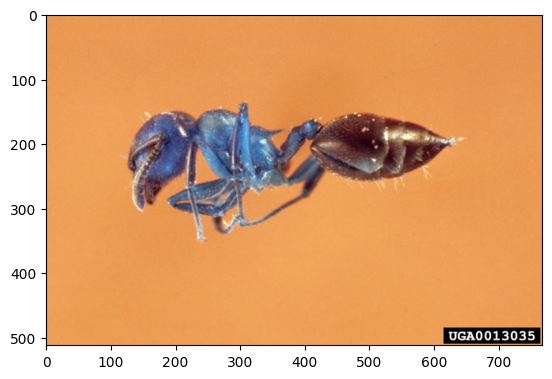

In [3]:
plt.imshow(cv2_img)

In [7]:
pil_img.show()

In [4]:
from torchvision import transforms
img_transforms = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

In [8]:
img_transforms(pil_img)

tensor([[[-0.6794, -0.6452, -0.6452,  ..., -0.7137, -0.7308, -0.7137],
         [-0.6452, -0.6452, -0.6623,  ..., -0.7137, -0.7137, -0.7137],
         [-0.6281, -0.6281, -0.6452,  ..., -0.6965, -0.6794, -0.7137],
         ...,
         [-0.6794, -0.6623, -0.6623,  ..., -0.6281, -0.6452, -0.6452],
         [-0.6965, -0.7137, -0.6965,  ..., -0.6281, -0.6452, -0.6452],
         [-0.6965, -0.6794, -0.6794,  ..., -0.6281, -0.6281, -0.6281]],

        [[ 0.6254,  0.6604,  0.6604,  ...,  0.5903,  0.5728,  0.6078],
         [ 0.6604,  0.6604,  0.6429,  ...,  0.5903,  0.5903,  0.6078],
         [ 0.6779,  0.6779,  0.6604,  ...,  0.6078,  0.6254,  0.6078],
         ...,
         [ 0.6954,  0.6954,  0.6954,  ...,  0.7654,  0.7479,  0.7479],
         [ 0.6604,  0.6429,  0.6604,  ...,  0.7654,  0.7479,  0.7479],
         [ 0.6779,  0.6779,  0.6779,  ...,  0.7654,  0.7654,  0.7654]],

        [[ 2.2566,  2.2914,  2.3088,  ...,  2.2566,  2.2391,  2.2740],
         [ 2.2914,  2.2914,  2.2740,  ...,  2

In [11]:
import torch
torch.randn(3, 5).argmax(dim=1).shape

torch.Size([3])

img_transforms()